In [ ]:
import os 
import pandas as pd
import numpy as np
import h5py
import json
from numpy import nan
from datetime import datetime, timedelta, date
from fractions import Fraction
from time import mktime
import time
import requests
import os.path
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

In [62]:
import seaborn as sns

In [11]:
def load_from_checkpoint(checkpoint_name):
    if os.path.isfile(checkpoint_name):
        return pd.read_hdf(checkpoint_name,'table')

In [117]:
original_df = load_from_checkpoint('./checkpoints/data_3.h5')  

In [194]:
binary_df = load_from_checkpoint('./checkpoints/data_binary_encoded.h5')  

In [195]:
binary_df.columns

Index(['device_id_name', 'week', 'day', 'month', 'hour', 'minute', 'second',
       'sun', 'outside_temperature', 'event_Active Fan LevelHigh',
       'event_Active Fan LevelOff', 'event_Auto ModeDisabled',
       'event_Auto ModeEnabled', 'event_Cool Stage 1Active',
       'event_Cool Stage 1Inactive', 'event_DoorLockLock',
       'event_DoorLockUnlock', 'event_FanAuto', 'event_FanOn',
       'event_Floor WarmingHeat:False', 'event_Floor WarmingOff:False',
       'event_Floor WarmingOff:True', 'event_GraceOccupancyDetected',
       'event_Heat Stage 1Active', 'event_Heat Stage 1Inactive',
       'event_HoldOff', 'event_HoldOn', 'event_Humidifier OffActive',
       'event_Humidifier OffInactive', 'event_OccupancyDetected',
       'event_VacancyDetected'],
      dtype='object')

In [202]:
binary_df.dtypes

day                              int64
event_Active Fan LevelHigh       int64
event_Active Fan LevelOff        int64
event_Auto ModeDisabled          int64
event_Auto ModeEnabled           int64
event_Cool Stage 1Active         int64
event_Cool Stage 1Inactive       int64
event_DoorLockLock               int64
event_DoorLockUnlock             int64
event_FanAuto                    int64
event_FanOn                      int64
event_Floor WarmingHeat:False    int64
event_Floor WarmingOff:False     int64
event_Floor WarmingOff:True      int64
event_GraceOccupancyDetected     int64
event_Heat Stage 1Active         int64
event_Heat Stage 1Inactive       int64
event_HoldOff                    int64
event_HoldOn                     int64
event_Humidifier OffActive       int64
event_Humidifier OffInactive     int64
event_OccupancyDetected          int64
event_VacancyDetected            int64
hour                             int64
minute                           int64
month                    

In [203]:
binary_df.head()

,day,event_Active Fan LevelHigh,event_Active Fan LevelOff,event_Auto ModeDisabled,event_Auto ModeEnabled,event_Cool Stage 1Active,event_Cool Stage 1Inactive,event_DoorLockLock,event_DoorLockUnlock,event_FanAuto,event_FanOn,event_Floor WarmingHeat:False,event_Floor WarmingOff:False,event_Floor WarmingOff:True,event_GraceOccupancyDetected,event_Heat Stage 1Active,event_Heat Stage 1Inactive,event_HoldOff,event_HoldOn,event_Humidifier OffActive,event_Humidifier OffInactive,event_OccupancyDetected,event_VacancyDetected,hour,minute,month,outside_temperature,second,sun,week
1,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,8,68,5,1,32
3,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,8,68,5,1,32
4,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,8,68,5,1,32
13,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,8,68,5,1,32
14,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,8,68,7,1,32


In [204]:
binary_df[binary_df == 0] = np.nan

In [181]:
original_col_df = binary_df[['week', 'day', 'month', 'hour',  'minute', 'second', 'sun', 'outside_temperature']].fillna(0)

In [182]:
binary_df = pd.concat([binary_df, original_col_df], axis=1)

In [119]:
original_df.event.unique()

array([nan, 'DoorLockLock', 'Cool Stage 1Inactive', 'Active Fan LevelOff',
       'OccupancyDetected', 'VacancyDetected', 'Cool Stage 1Active',
       'Active Fan LevelHigh', 'HoldOn', 'GraceOccupancyDetected',
       'DoorLockUnlock', 'HoldOff', 'Heat Stage 1Active',
       'Heat Stage 1Inactive', 'FanOn', 'FanAuto',
       'Floor WarmingHeat:False', 'Floor WarmingOff:False',
       'Humidifier OffInactive', 'Auto ModeEnabled', 'Auto ModeDisabled',
       'Floor WarmingOff:True', 'Humidifier OffActive'], dtype=object)

### Let's take a closer look at locking or unlocking door events

In [96]:
other_columns = ['week', 'day', 'month', 'hour',  'minute', 'second', 'sun', 'outside_temperature']

In [97]:
door_columns = other_columns + ['event_DoorLockLock', 'event_DoorLockUnlock']
door_lock_df = binary_df[door_columns]

In [147]:
len(binary_df.month.unique())

10

In [146]:
len(binary_df.loc[binary_df.event_DoorLockLock == 1])

313

In [137]:
df_lock_count = door_lock_df[['event_DoorLockLock', 'hour']].groupby(['hour'], as_index=False).sum()

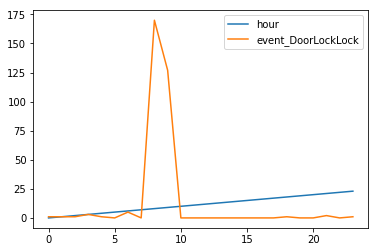

In [138]:
df_lock_count.plot()

In [126]:
df_unlock_count = door_lock_df[['event_DoorLockUnlock', 'hour']].groupby(['hour'], as_index=False).sum()

In [148]:
len(binary_df.loc[binary_df.event_DoorLockUnlock == 1])

24

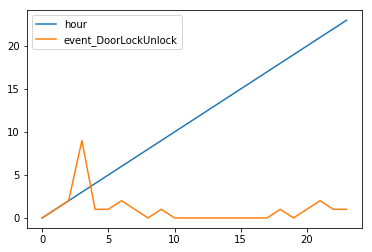

In [149]:
df_unlock_count.plot()

### Binary distribution over events

In [162]:
len(door_lock_df['event_DoorLockLock'])

849291

In [163]:
door_lock_df['event_DoorLockLock'].sum()

313